# Create Figures for Paper

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

fsize = 15
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

errbar_kwargs = dict(marker='.', capsize=3, elinewidth=1)
plot_kwargs = dict(marker='.')
errband_kwargs = dict(alpha=0.25)

## Pairwise Order relation

`experiments/pairwise_order`

In [2]:
%%capture
figure_data = pd.read_csv('figure_data/pairwise_order_learning_curves_2023-05-15-2350.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train_size'])
metrics = ['binary_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

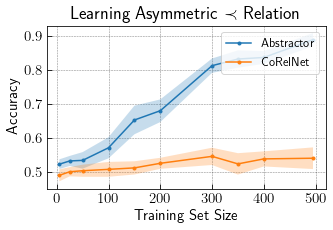

In [3]:
fig, ax = plt.subplots(figsize=(5,3))
x_name = 'train_size'
metric_name = 'binary_accuracy'
for group in ('abstractor', 'corelnet'):
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    group_name = 'Abstractor' if group=='abstractor' else 'CoRelNet'
    ax.plot(x, y, **plot_kwargs, label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Accuracy');
ax.set_title('Learning Asymmetric $\prec$ Relation')
ax.legend(loc='upper right', fontsize='small', fancybox=True, frameon=True, framealpha=0.8);
fig.savefig('figures/pairwise_order_learning_curves.pdf')

## Random Object Sorting

experiment in `experiments/object_argsort_autoregressive`

W&B project: `object_argsort_autoregressive`

In [4]:
%%capture
figure_data = pd.read_csv('figure_data/object_argsort_autoregressive.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train size'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy', 'epoch/epoch']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

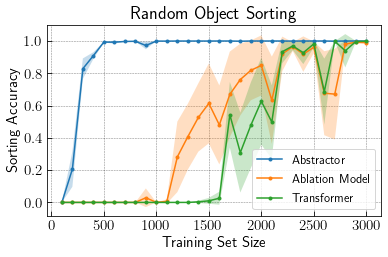

In [5]:
fig, ax = plt.subplots(figsize=(6,3.5))
x_name = 'train size'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Abstractor': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='lower right', fontsize='small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Random Object Sorting');
fig.savefig('figures/random_object_sorting.pdf')

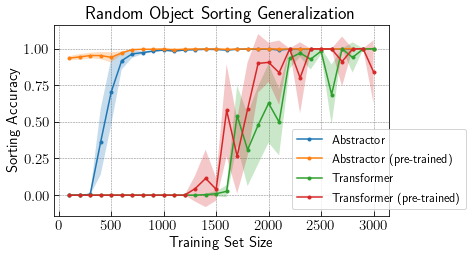

In [6]:
fig, ax = plt.subplots(figsize=(6,3.5))
x_name = 'train size'
metric_name = 'full_sequence_accuracy'

label_map = {
    'Simple Abstractor': 'Abstractor',
    'Simple Abstractor (Pre-Trained; reshuffled attr)': 'Abstractor (pre-trained)',
    'Transformer': 'Transformer', 'Transformer (Pre-Trained; reshuffled attr)': 'Transformer (pre-trained)'}
# color_palette = ['#73a2c6', '#00429d', '#f4777f', '#93003a']
# color_map = {label: color for label, color in zip(label_map.keys(), color_palette)}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='lower right', bbox_to_anchor=(1.25,0), fontsize='small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Random Object Sorting Generalization');
fig.savefig('figures/random_object_sorting.pdf')

## Robustness

directory: `experiments/robustness_object_sorting`
W&B project: `robustness_object_sorting`

In [7]:
%%capture
figure_data = pd.read_csv('figure_data/multiplicative_robustness_data.csv', index_col=0)
agg_figure_data = figure_data.groupby(['model', 'noise level'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

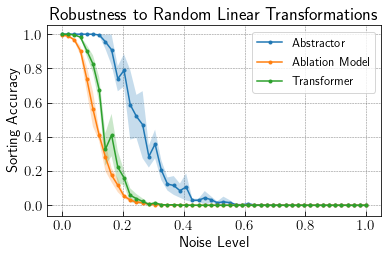

In [8]:
fig, ax = plt.subplots(figsize=(6,3.5))
x_name = 'noise level'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Model': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.model==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, errorevery=3, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, **errband_kwargs)

ax.set_xlabel('Noise Level');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='upper right', fontsize='small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Robustness to Random Linear Transformations');
fig.savefig('figures/multiplicative_robustness.pdf')